<a href="https://colab.research.google.com/github/harishmuh/machine_learning_practices/blob/main/scaling_encoding_tips_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# `Scaling and Encoding`

### `1. Feature Scaling`

**Definition**: Feature scaling is a method used to standardize the range of independent variables or features of data. In data processing, it is also known as data normalization and is generally performed during the data preprocessing step.

#### **1.1. Why Feature Scaling Matters**

- If range of inputs varies, in some algorithms, object functions will not work properly.
- Gradient descent converges much faster with feature scaling done. Gradient descent is a common optimization algorithm used in logistic regression, SVMs, neural networks etc.
- Algorithms that involve distance calculation like KNN, Clustering are also affected by the magnitude of the feature. Just consider how Euclidean distance is calculated: taking the square root of the sum of the squared differences between observations. This distance can be greatly affected by differences in scale among the variables. Variables with large variances have a larger effect on this measure than variables with small variances.

**Note:** Tree-based algorithms are almost the only algorithms that are not affected by the magnitude of the input, as we can easily see from how trees are built. When deciding how to make a split, tree algorithm look for decisions like "whether feature value X>3.0" and compute the purity of the child node after the split, so the scale of the feature does not count.

#### **1.2. How to Handle Feature Scaling**

| **Method** | **Definition** |
| --- | --- |
| Normalization - Standardization (Z-score scaling) | removes the mean and scales the data to unit variance. <br> $$X_\text{scaled} = \frac{(X - X_\text{mean})} {Stdev}$$ |
| Min-Max scaling | transforms features by scaling each feature to a given range. Default to [0,1]. <br> $$X_\text{scaled} = \frac{(X - X_\text{min})} {(X_\text{max} - X_\text{min})}$$ |
| Robust scaling | 	removes the median and scales the data according to the quantile range (defaults to IQR) <br> $$X_\text{scaled} = \frac{(X - X_\text{median})} {IQR}$$ |

A comparison of three methods when facing outliers: [img source](https://stackoverflow.com/questions/51841506/data-standardization-vs-normalization-vs-robust-scaler)

As we can see, Normalization - Standardization and Min-Max method will compress most data to a narrow range, while robust scaler does a better job at keeping the spread of the data, **although it cannot remove the outlier** from the processed result. Remember removing/imputing outliers is another topic in data cleaning and should be done beforehand.

Experience on how to choose feature scaling method:

- If your feature is not Gaussian like, say, has a skewed distribution or has outliers, Normalization - Standardization is not a good choice as it will compress most data to a narrow range.
- However, we can transform the feature into Gaussian like and then use Normalization - Standardization.
- When performing distance or covariance calculation (**algorithm like Clustering, PCA and LDA**), it is better to use Normalization - Standardization as it will remove the effect of scales on variance and covariance. Explanation here.
- Min-Max scaling has the same drawbacks as Normalization - Standardization, and also new data may not be bounded to [0,1] as they can be out of the original range. Some algorithms, for example some deep learning network prefer input on a 0-1 scale so this is a good choice.

Below is some additional resource on this topic:

- A comparison of the three methods when facing skewed variables can be found [here](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py).
- An in-depth study of feature scaling can be found [here](http://sebastianraschka.com/Articles/2014_about_feature_scaling.html).

#### **1.3. Applying the Feature Scaling**

In [19]:
# Installing additional library
!pip install category_encoders # Category encoder

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 1.4 MB/s eta 0:00:00


In [1]:
# Importing required library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
def create_histogram(data):

    # setting figures
    fig, axes = plt.subplots(1,2, figsize=(6,3))

    # histogram 'tip'
    sns.histplot(data=data, x='tip', ax=axes[0])

    # histogram 'total bill'
    sns.histplot(data=data, x='total_bill', ax=axes[1])

    plt.tight_layout()
    plt.show()

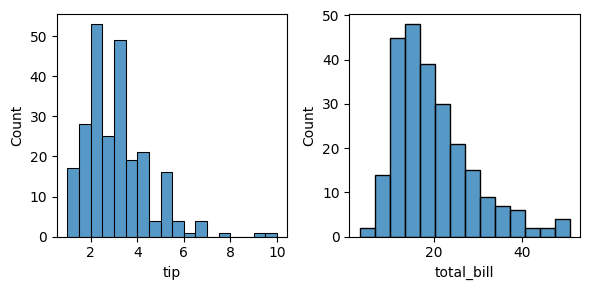

In [4]:
create_histogram(tips)

In [5]:
X = tips[['tip', 'total_bill']]
X.describe()

,tip,total_bill
count,244.000000,244.000000
mean,2.998279,19.785943
std,1.383638,8.902412
min,1.000000,3.070000
25%,2.000000,13.347500
50%,2.900000,17.795000
75%,3.562500,24.127500
max,10.000000,50.810000


> MinMaxScaler

- min = 0
- max = 1

In [6]:
# MinMaxScaler()
from sklearn.preprocessing import MinMaxScaler

# define scaler
scaler = MinMaxScaler()

# fitting scaler
scaler.fit(X)

# transform
X_minmax = scaler.transform(X)

# create datafrane
X_minmax = pd.DataFrame(X_minmax, columns=X.columns)
X_minmax.describe()

,tip,total_bill
count,244.000000,244.000000
mean,0.222031,0.350145
std,0.153738,0.186477
min,0.000000,0.000000
25%,0.111111,0.215281
50%,0.211111,0.308442
75%,0.284722,0.441087
max,1.000000,1.000000


In [7]:
X.head(), X_minmax[:5]

(    tip  total_bill
 0  1.01       16.99
 1  1.66       10.34
 2  3.50       21.01
 3  3.31       23.68
 4  3.61       24.59,
         tip  total_bill
 0  0.001111    0.291579
 1  0.073333    0.152283
 2  0.277778    0.375786
 3  0.256667    0.431713
 4  0.290000    0.450775)

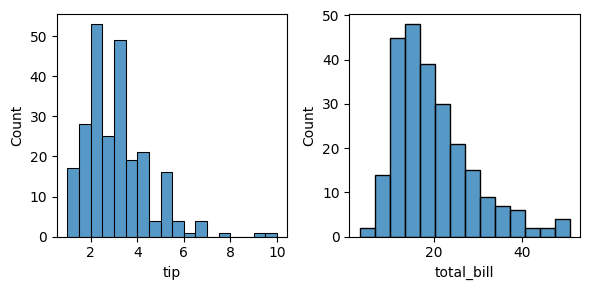

In [8]:
# Histogram tips and total bill
create_histogram(tips)

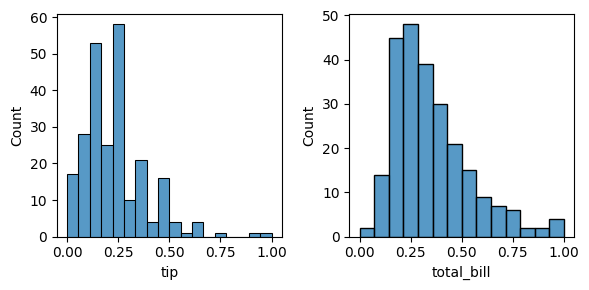

In [9]:
# Histogram tips and total bill (scaled)
create_histogram(X_minmax)

> StandardScaler

- mean = 0
- std = 1

In [10]:
# StandardScaler
from sklearn.preprocessing import StandardScaler

# change the average data to be close to zero and std = 1

# define scaler
scaler = StandardScaler()

# fit and transform
X_standard = scaler.fit_transform(X)

# create dataframe
X_standard= pd.DataFrame(X_standard, columns=X.columns)
X_standard.describe()


,tip,total_bill
count,2.440000e+02,2.440000e+02
mean,2.839259e-16,-7.871663e-17
std,1.002056e+00,1.002056e+00
min,-1.447189e+00,-1.881547e+00
25%,-7.229713e-01,-7.247111e-01
50%,-7.117518e-02,-2.241005e-01
75%,4.086192e-01,4.886857e-01
max,5.070772e+00,3.492068e+00


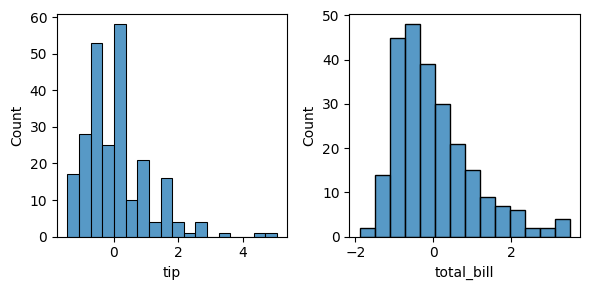

In [11]:
create_histogram(X_standard)

> RobustScaler

- median = 0
- iqr = 1

In [12]:
# RobustScaler
from sklearn.preprocessing import RobustScaler

# fit and transform
X_robust = RobustScaler().fit_transform(X)

# create datafrane
X_robust= pd.DataFrame(X_robust, columns=X.columns)
X_robust.describe()



,tip,total_bill
count,244.000000,2.440000e+02
mean,0.062898,1.846886e-01
std,0.885528,8.258267e-01
min,-1.216000,-1.365955e+00
25%,-0.576000,-4.125696e-01
50%,0.000000,-1.647987e-16
75%,0.424000,5.874304e-01
max,4.544000,3.062616e+00


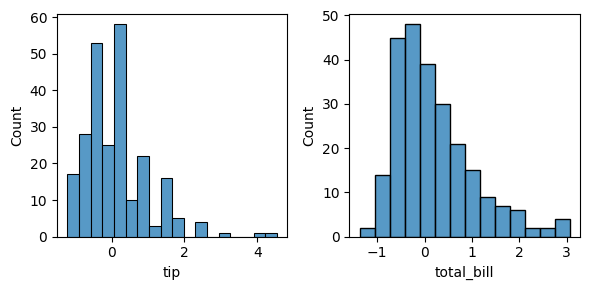

In [13]:
create_histogram(X_robust)

___

### `2. Feature Encoding`

**Definition**: Transform the categorical values of the relevant features into numerical ones.

#### **2.1. Why Feature Encoding Matters**

We must transform strings of categorical variables into numbers so that algorithms can handle those values. Even if you see an algorithm can take into categorical inputs, it's most likely that the algorithm incorporate the encoding process within.

#### **2.2. How to Handle Feature Encoding**

| **Method** | **Definition** |
| --- | --- |
| One-hot encoding | replace the categorical variable by different boolean variables (0/1) to indicate whether or not certain label is true for that observation |
| Ordinal-encoding | replace the labels by some ordinal number if ordinal is meaningful |
| Binary-encoding | similar to onehot, but stores categories as binary bitstrings |

**Note:**

- if we are using one-hot encoding in linear regression, we should keep k-1 binary variable to avoid multicollinearity. This is true for any algorithms that look at all features at the same time during training. Including SVM, neural network and clustering. Tree-based algorithm, on the other hand, need the entire set of binary variable to select the best split.
- it is not recommended to use one-hot encoding with tree algorithms. One-hot will cause the split be highly imbalanced (as each label of the original categorical feature will now be a new feature), and the result is that neither of the two child nodes will have a good gain in purity. The prediction power of the one-hot feature will be weaker than the original feature as they have been broken into many pieces.

#### **2.3. Applying the Feature Encoding**

> One Hot Encoding

One Hot Encoding also can be implemented using sklearn library. We use `OneHotEncoder` and `ColumnTransformer` classes. OneHotEncoder for the one hot encoding method and ColumnTransformer to select which variable to transform.

In [14]:
# Use of ColumnTransformer
from sklearn.compose import ColumnTransformer # combine several preprocessing stages

In [15]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [16]:
from sklearn.preprocessing import OneHotEncoder

transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['sex', 'smoker', 'day', 'time']) # give the column name # drop=first to remove the column from the first unique value
], remainder='passthrough') # remainder displays the remaining unprocessed columns

tips_encoded = transformer.fit_transform(tips)                  # Melakukan fit dan transform
col_onehot = transformer.get_feature_names_out()                # nama kolom
pd.DataFrame(tips_encoded, columns=col_onehot)

,onehot__sex_Male,onehot__smoker_Yes,onehot__day_Sat,onehot__day_Sun,onehot__day_Thur,onehot__time_Lunch,remainder__total_bill,remainder__tip,remainder__size
0,0.0,0.0,0.0,1.0,0.0,0.0,16.99,1.01,2.0
1,1.0,0.0,0.0,1.0,0.0,0.0,10.34,1.66,3.0
2,1.0,0.0,0.0,1.0,0.0,0.0,21.01,3.50,3.0
3,1.0,0.0,0.0,1.0,0.0,0.0,23.68,3.31,2.0
4,0.0,0.0,0.0,1.0,0.0,0.0,24.59,3.61,4.0
...,...,...,...,...,...,...,...,...,...
239,1.0,0.0,1.0,0.0,0.0,0.0,29.03,5.92,3.0
240,0.0,1.0,1.0,0.0,0.0,0.0,27.18,2.00,2.0
241,1.0,1.0,1.0,0.0,0.0,0.0,22.67,2.00,2.0
242,1.0,0.0,1.0,0.0,0.0,0.0,17.82,1.75,2.0


In [17]:
transformer.get_feature_names_out()

array(['onehot__sex_Male', 'onehot__smoker_Yes', 'onehot__day_Sat',
       'onehot__day_Sun', 'onehot__day_Thur', 'onehot__time_Lunch',
       'remainder__total_bill', 'remainder__tip', 'remainder__size'],
      dtype=object)

> Ordinal Encoding

In [20]:
# Import OrdinalEncoder
from category_encoders import OrdinalEncoder

In [21]:
ordinal_mapping = [
    {'col': 'day', 'mapping': {None:0, 'Thur':1, 'Fri':2, 'Sat':3, 'Sun':4}},
    {'col': 'time', 'mapping': {None:0, 'Lunch':1, 'Dinner':2}}
]

In [22]:
transformer = ColumnTransformer([
    ('ordinal', OrdinalEncoder(cols=['day', 'time'], mapping=ordinal_mapping), ['day', 'time'])
], remainder='passthrough')

tips_encoded = transformer.fit_transform(tips)
tips_encoded

col_ordinal = transformer.get_feature_names_out()
pd.DataFrame(tips_encoded, columns=col_ordinal)

,ordinal__day,ordinal__time,remainder__total_bill,remainder__tip,remainder__sex,remainder__smoker,remainder__size
0,4,2,16.99,1.01,Female,No,2
1,4,2,10.34,1.66,Male,No,3
2,4,2,21.01,3.5,Male,No,3
3,4,2,23.68,3.31,Male,No,2
4,4,2,24.59,3.61,Female,No,4
...,...,...,...,...,...,...,...
239,3,2,29.03,5.92,Male,No,3
240,3,2,27.18,2.0,Female,Yes,2
241,3,2,22.67,2.0,Male,Yes,2
242,3,2,17.82,1.75,Male,No,2


In [23]:
transformer.get_feature_names_out()

array(['ordinal__day', 'ordinal__time', 'remainder__total_bill',
       'remainder__tip', 'remainder__sex', 'remainder__smoker',
       'remainder__size'], dtype=object)

> Binary Encoding

Binary encoding using category_encoder library. We will implement binary encoding using the category_encoders library. We will implement binary encoding to day variable.

In [24]:
from category_encoders import BinaryEncoder

transformer = ColumnTransformer([
    ('binary', BinaryEncoder(), ['day'])
], remainder='passthrough')

tips_encoded = transformer.fit_transform(tips)
tips_encoded

col_binary = transformer.get_feature_names_out()
pd.DataFrame(tips_encoded, columns=col_binary).sample(15)

,binary__day_0,binary__day_1,binary__day_2,remainder__total_bill,remainder__tip,remainder__sex,remainder__smoker,remainder__time,remainder__size
61,0,1,0,13.81,2.0,Male,Yes,Dinner,2
152,0,0,1,17.26,2.74,Male,No,Dinner,3
188,0,0,1,18.15,3.5,Female,Yes,Dinner,3
58,0,1,0,11.24,1.76,Male,Yes,Dinner,2
144,0,1,1,16.43,2.3,Female,No,Lunch,2
76,0,1,0,17.92,3.08,Male,Yes,Dinner,2
7,0,0,1,26.88,3.12,Male,No,Dinner,4
196,0,1,1,10.34,2.0,Male,Yes,Lunch,2
116,0,0,1,29.93,5.07,Male,No,Dinner,4
174,0,0,1,16.82,4.0,Male,Yes,Dinner,2


___

### `3. Application`

`Data Cleaning`

**Duplicated Value**, Data duplication detection and quantification

In [26]:
print(f"Total duplicated data: {tips[tips.duplicated()].shape}")
print(f'Percentage of duplicated data: {len(tips[tips.duplicated()])/len(tips)*100:.2f}%')

Total duplicated data: (1, 7)
Percentage of duplicated data: 0.41%


As much as 0.41% of the data is indicated as duplicate, so remove one of them.

Handling duplicated data:

In [27]:
tips.drop_duplicates(keep='first', inplace=True, ignore_index=True)

**Missing Value**, Detection and quantification of missing values

In [28]:
tips.isna().sum().to_frame('Total Missing Value')

,Total Missing Value
total_bill,0
tip,0
sex,0
smoker,0
day,0
time,0
size,0


There are no missing values.

An outlier is a data point that differs significantly from the rest of the data. Linear models, especially linear regression, are sensitive to outliers. Therefore, we need to detect and handle outliers.

First, try detecting and quantifying outliers univariately.

In [29]:
numerical = [var for var in tips.columns if tips[var].dtypes !='category']

In [30]:
def calculate_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

outlier_data = []

for column in numerical:
    outlier_result, lower_bound, upper_bound = calculate_outliers(tips, column)
    total_outlier = len(outlier_result)
    outlier_percentage = round(total_outlier / len(tips[column]) * 100, 2)
    outlier_data.append([column, total_outlier, outlier_percentage, lower_bound, upper_bound])

outlier_df = pd.DataFrame(outlier_data, columns=["Column", "Total Outliers", "Percentage (%)", "Lower Bound", "Upper Bound"])
outlier_df

,Column,Total Outliers,Percentage (%),Lower Bound,Upper Bound
0,total_bill,9,3.70,-2.8125,40.3675
1,tip,8,3.29,-0.3625,5.9375
2,size,9,3.70,0.5000,4.5000


There are outliers of around 3.29 ~ 3.7% in the total_bill, tip, and size columns. In this case, we will try to eliminate the outliers first.

In [31]:
tips.shape

(243, 7)

In [32]:
for i, row in outlier_df.iterrows(): # iterrows, each row will be operated on
    tips = tips[(tips[row['Column']] > row['Lower Bound']) &  (tips[row['Column']] < row['Upper Bound'])]

In [33]:
tips.shape

(223, 7)

`Data Splitting`

Divide the dataset into train and test sets with a composition of 80:20.

In [34]:
from sklearn.model_selection import train_test_split

# define feature and target
X = tips.drop(columns=['tip'])
y = tips['tip']

# data spliting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)
X_train.shape, X_test.shape

((178, 6), (45, 6))

`Data Preprocessing`

**Encoding**

Next, we will convert the categorical variables into numerical variables.

- One-Hot Encoding: `sex, smoker`
- Ordinal Encoding: `day`
- Binary Encoding: `time` (for practice purposes)

In [35]:
ordinal_mapping = [
    {'col': 'day', 'mapping': {None:0, 'Thur':1, 'Fri':2, 'Sat':3, 'Sun':4}},
]

In [36]:
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['sex', 'smoker']),
    ('ordinal', OrdinalEncoder(cols=['day'], mapping=ordinal_mapping), ['day']),
    ('binary', BinaryEncoder(), ['time'])
], remainder='passthrough')
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehot', OneHotEncoder(drop='first'),
                                 ['sex', 'smoker']),
                                ('ordinal',
                                 OrdinalEncoder(cols=['day'],
                                                mapping=[{'col': 'day',
                                                          'data_type': dtype('O'),
                                                          'mapping': None    0
Thur    1
Fri     2
Sat     3
Sun     4
dtype: int64}]),
                                 ['day']),
                                ('binary', BinaryEncoder(), ['time'])])

In [37]:
# Encoding
# fit
transformer.fit(X_train)

X_train_encod = transformer.transform(X_train)
X_test_encod = transformer.transform(X_test)

**Scaling**

Next we will do scaling, for example by using RobustScaler.


In [38]:
# define scaler
scaler = RobustScaler()

# fit
scaler.fit(X_train_encod)

# transform
X_train_encod_scaled = scaler.transform(X_train_encod)
X_test_encod_scaled = scaler.transform(X_test_encod)



In [39]:
feature_names = transformer.get_feature_names_out()
feature_names

array(['onehot__sex_Male', 'onehot__smoker_Yes', 'ordinal__day',
       'binary__time_0', 'binary__time_1', 'remainder__total_bill',
       'remainder__size'], dtype=object)

Next we will convert the data into a dataframe.

In [40]:
X_train_prep = pd.DataFrame(X_train_encod_scaled, columns=feature_names)
X_test_prep = pd.DataFrame(X_test_encod_scaled, columns=feature_names)

X_train_prep

,onehot__sex_Male,onehot__smoker_Yes,ordinal__day,binary__time_0,binary__time_1,remainder__total_bill,remainder__size
0,0.0,0.0,0.000000,0.0,0.0,0.090209,0.0
1,0.0,0.0,0.333333,0.0,0.0,0.033003,1.0
2,-1.0,0.0,0.000000,0.0,0.0,2.075908,1.0
3,0.0,1.0,-0.333333,1.0,-1.0,-0.528053,0.0
4,-1.0,0.0,-0.666667,1.0,-1.0,0.184818,1.0
...,...,...,...,...,...,...,...
173,0.0,0.0,0.000000,0.0,0.0,-0.543454,0.0
174,0.0,1.0,0.000000,0.0,0.0,1.441144,1.0
175,-1.0,0.0,-0.666667,1.0,-1.0,-0.389439,0.0
176,0.0,0.0,0.333333,0.0,0.0,0.118812,0.0


### `Modeling`

**Multiple Linear Regression**

In [41]:
import statsmodels.api as sm
from statsmodels.compat import lzip
from sklearn.metrics import mean_squared_error

In [42]:
# define model
multipleLR = sm.OLS(y_train.reset_index(drop=True), sm.add_constant(X_train_prep))

# fitting
multipleLR_result = multipleLR.fit()

Prediction on the test set using multiple linear regression

In [43]:
y_pred = multipleLR_result.predict(sm.add_constant(X_test_prep))
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}')

MSE: 0.6619103643994023
RMSE: 0.8135787389057081


In [44]:
print(multipleLR_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.387
Model:                            OLS   Adj. R-squared:                  0.365
Method:                 Least Squares   F-statistic:                     17.99
Date:                Thu, 11 Sep 2025   Prob (F-statistic):           3.96e-16
Time:                        09:27:47   Log-Likelihood:                -226.50
No. Observations:                 178   AIC:                             467.0
Df Residuals:                     171   BIC:                             489.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     2.62

**Interpretation**

`Linear Regression Equation`

$$
\text{Tips} = 2.624 - 0.078 \times \text{sex_Male}
- 0.036 \times \text{smoker_Yes}
+ 0.205 \times \text{time_0}
- 0.205 \times \text{time_1}
+ 0.603 \times \text{day}
+ 0.858 \times \text{total_bill}
+ 0.021 \times \text{size}
$$

---

`R-Squared`
- The model explains **38.7%** of the variance in tips.  
- The remaining **61.3%** of the variance is explained by other variables not included in this model.

---

`F-test (Simultaneous Test)`
- Prob (F-statistic) = **3.96e-16 < 0.05**  
- Reject H₀ → At least one predictor in the model has a significant effect on tips.

---

`t-test (Partial Test)`

- **Intercept (const)**: p-value = 0.000 → significant, the model requires an intercept.  
- **sex_Male**: p-value = 0.587 → not significant.  
- **smoker_Yes**: p-value = 0.798 → not significant.  
- **time_0**: p-value = 0.192 → not significant.  
- **time_1**: p-value = 0.192 → not significant.  
- **day**: p-value = 0.106 → not significant (borderline).  
- **total_bill**: p-value = 0.000 → significant, total bill strongly influences tips.  
- **size**: p-value = 0.845 → not significant.  

---

`Parameter Estimates`

- **const = 2.624**: When all features are zero, the baseline tip is USD 2.624 (though not realistic, this indicates the need for an intercept).  
- **sex_Male = -0.078**: On average, male customers give USD 0.078 less in tips compared to female customers, but not statistically significant.  
- **smoker_Yes = -0.036**: Smokers tend to give USD 0.036 less in tips compared to non-smokers, but not significant.  
- **time_0 = 0.205**: If `time_0` = 1, tips increase by USD 0.205 (not significant).  
- **time_1 = -0.205**: If `time_1` = 1, tips decrease by USD 0.205 (not significant).  
- **day = 0.603**: Each additional day unit increases tips by USD 0.603. For example, compared to Thursday:  
  - Friday: USD +0.603  
  - Saturday: USD +1.206  
  - Sunday: USD +1.809  
- **total_bill = 0.858**: For every USD 1 increase in total bill, the tip increases by approximately USD 0.86.  
- **size = 0.021**: For each additional person in the group, tips increase by USD 0.021, but this is not significant.  



`Model Limitations`
- Valid only for `total_bill` values between **USD 3.07 – USD 40.17**.  
- Valid only for `sex` categories: Male, Female.  
- Valid only for `smoker` categories: Yes, No.  
- Valid only for `day` categories: Thursday, Friday, Saturday, Sunday.  
- Valid only for `size` values between **1 – 4 people**.  


In [46]:
name = ['Lagrange Multiplier Statistic', 'P-value']
test = sm.stats.het_breuschpagan(multipleLR_result.resid, multipleLR_result.model.exog)

list(zip(name, test))

[('Lagrange Multiplier Statistic', np.float64(22.20002079849502)),
 ('P-value', np.float64(0.0023463148691241146))]

`Feature Importance`

In [47]:
df_result = pd.DataFrame({
    'coef': multipleLR_result.params
}).reset_index().sort_values('coef')

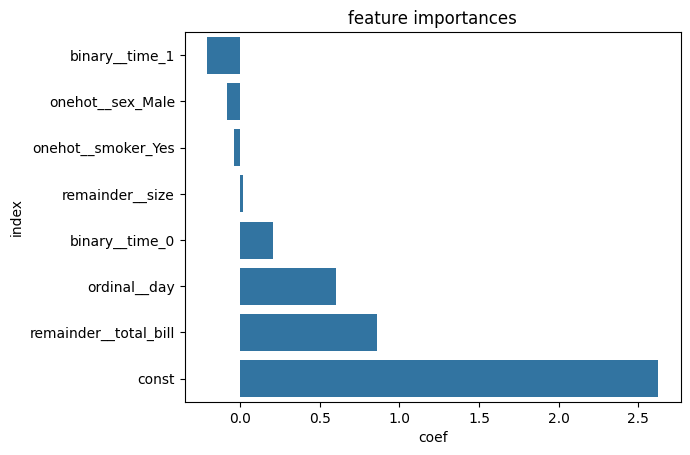

In [48]:
sns.barplot(data=df_result, x='coef', y='index')
plt.title('feature importances')
plt.show()

Total bill, day, and time are the features that most influence tips.

`residual`

In [49]:
multipleLR_result.resid.mean()

np.float64(1.6466229129271985e-16)

Text(0, 0.5, 'Residuals')

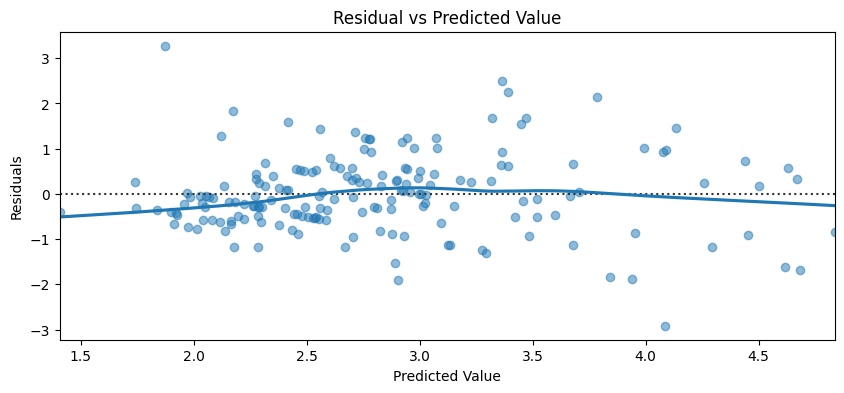

In [50]:
plt.figure(figsize=(10,4))

plot = sns.residplot(
    x=multipleLR_result.fittedvalues,                  # y_pred
    y=y_train,
    lowess=True,                                        # Adding line
    scatter_kws={'alpha':0.5}                           # Oppacity
)

plot.set_title('Residual vs Predicted Value')
plot.set_xlabel('Predicted Value')
plot.set_ylabel('Residuals')

- **Residual Mean**: 1.65e-16 (close to 0)
- **Prob(JB) < 0.05**: normal distribution
- **Durbin-Watson ~= 2**: Uncorrelated
- **Prop(BP-test) < 0.05**: Homoscedasticity